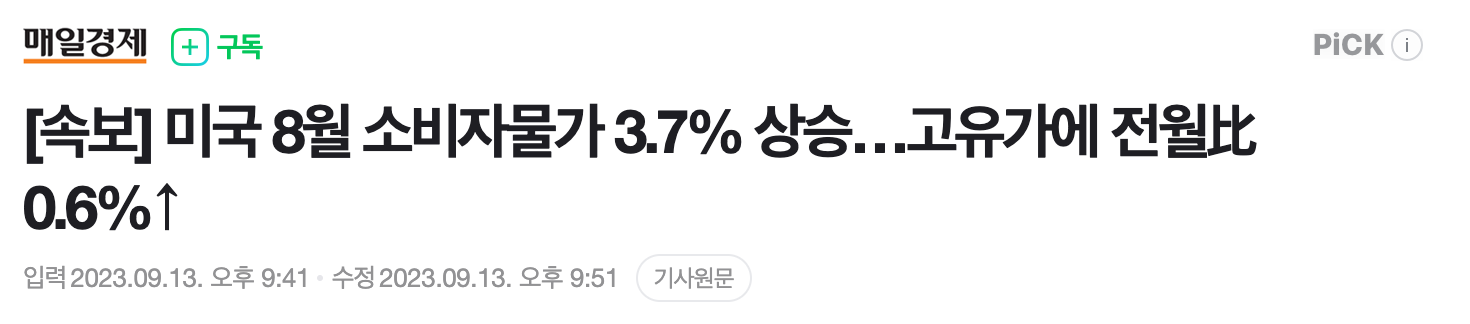

In [1]:
import requests    # browser 와 server 간 통신
from io import StringIO    # 문자열을 파일처럼
import pandas as pd

In [2]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv'

In [13]:
params = {
    'id': 'UNRATE',
}

In [14]:
r = requests.get(url, params=params)

In [5]:
df = pd.read_csv(StringIO(r.text), index_col=0, parse_dates=True, header=0, na_values=".",)
df

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-04-01,302.918
2023-05-01,303.294
2023-06-01,303.841


In [6]:
# 전년대비
df['yoy'] = df['CPIAUCSL'] / df['CPIAUCSL'].shift(12) - 1
df.tail()

,CPIAUCSL,yoy
DATE,,
2023-04-01,302.918,0.049572
2023-05-01,303.294,0.041288
2023-06-01,303.841,0.030920
2023-07-01,304.348,0.032991
2023-08-01,306.269,0.037075


In [7]:
# 전월대비
df['mom'] = df['CPIAUCSL'] / df['CPIAUCSL'].shift(1) - 1
df.tail()

,CPIAUCSL,yoy,mom
DATE,,,
2023-04-01,302.918,0.049572,0.003678
2023-05-01,303.294,0.041288,0.001241
2023-06-01,303.841,0.030920,0.001804
2023-07-01,304.348,0.032991,0.001669
2023-08-01,306.269,0.037075,0.006312


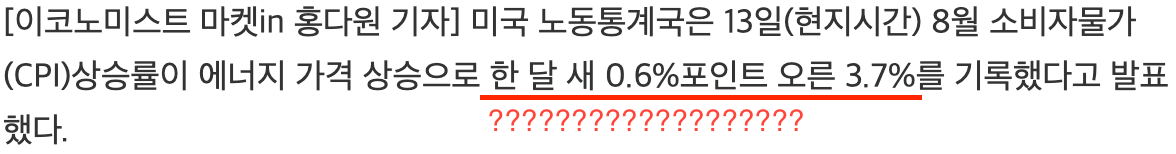

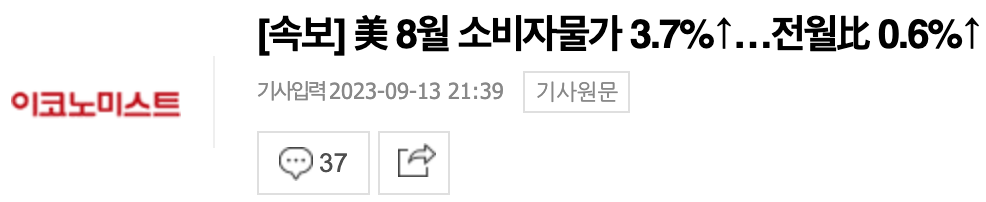

## plotly

In [8]:
import plotly.express as px

In [9]:
fig = px.area(df, x=df.index, y='CPIAUCSL')

fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)
fig.show()

In [10]:
fig = px.area(df, x=df.index, y='yoy')

fig.show()

In [12]:
fig = px.area(df, x=df.index, y='mom')
fig.show()